# <CENTER> <U> <FONT COLOR="pURPLE">MDS 271 - MACHINE LEARNING<br><br> CIA 03 - GARBAGE SEGREGATION USING IMAGE CLASSIFICATION<br><br><FONT SIZE=3>AJITH_JIJI_2248003 || AMRUTHA_M_2248026 || ANSIKA_BABU_2248068


## AIM:
Garbage segregation involves separating wastes according to how it's handled or processed. It's important for recycling as some materials are recyclable and others are not. The aim of the project is to classify the images provided into trash, cardboard, plastic, paper, glass or metal. This classification helps in garbage seggregation such that the garbage can be identifed and classified easily.

We will be using tensorflow and deep neural networking algorithms to classify, train, test and predict the images.

## IMPORTING TENSORFLOW

In [ ]:
import tensorflow as tf

TensorFlow is a free and open-source software library for machine learning and artificial intelligence. We use tensor flow to classify the images.

## USING CPU


In [ ]:
device = "/device:CPU:0"

## IMPORT THE DATASET:

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import math

dir_example = "Data"

classes = os.listdir(dir_example)
print(classes)

['Test', 'Train']


In [ ]:
dir_example = "Data/Train"

train_classes = os.listdir(dir_example)
print(train_classes)

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


The image dataset has been imported. It has 6 different images that are supposed to be classified. They are :- Cardboard, Glass, Metal, Paper, Plastic and Trash.

## DATA VISUALIZATION

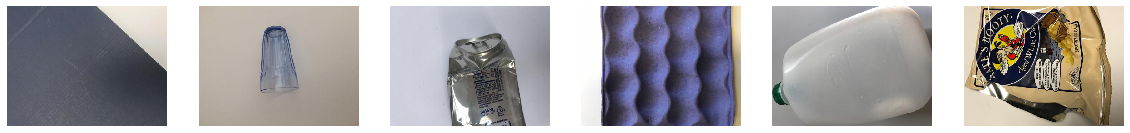

In [ ]:
dir_with_examples = 'visualize'
files_per_row = 6
files_in_dir = os.listdir(dir_with_examples)
number_of_cols = files_per_row
number_of_rows = int(len(files_in_dir) / number_of_cols)

# Generate the subplots
fig, axs = plt.subplots(number_of_rows, number_of_cols)
fig.set_size_inches(20, 15, forward=True)

# Map each file to subplot
try:
  for i in range(0, len(files_in_dir)):
    file_name = files_in_dir[i]
    image = Image.open(f'{dir_with_examples}/{file_name}')
    row = math.floor(i / files_per_row)
    col = i % files_per_row
    axs[col].imshow(image)
    axs[col].axis('off')
except:
  pass
# Show the plot
plt.show()

The plots of the segregation are shown above.

In [ ]:
#Importing the libraries
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, SpatialDropout2D
from tensorflow.keras.losses import sparse_categorical_crossentropy, binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


## PREPARING OF DATA

In [ ]:
train = 'Data/Train'
test = 'Data/Test'

In [ ]:
train_generator = ImageDataGenerator(rescale = 1/255)

train_generator = train_generator.flow_from_directory(train,
                                                      target_size = (300,300),
                                                      batch_size = 32,
                                                      class_mode = 'sparse')

labels = (train_generator.class_indices)
print(labels,'\n')

labels = dict((v,k) for k,v in labels.items())
print(labels)

Found 2186 images belonging to 6 classes.
{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5} 

{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


We have splitted the data into train and test. We have given the labels to the train data. The labelling starts from 0 representing 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'.

In [ ]:
for image_batch, label_batch in train_generator:
  break
image_batch.shape, label_batch.shape

((32, 300, 300, 3), (32,))

In [ ]:
test_generator = ImageDataGenerator(rescale = 1./255)

test_generator = test_generator.flow_from_directory(test,
                                                    target_size = (300,300),
                                                    batch_size = 32,
                                                    class_mode = 'sparse')

test_labels = (test_generator.class_indices)
print(test_labels,'\n')

test_labels = dict((v,k) for k,v in test_labels.items())
print(test_labels)

Found 343 images belonging to 6 classes.
{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5} 

{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


We have given the labels to the test data. The labelling starts from 0 representing 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'.

## LABELING

In [ ]:
print(train_generator.class_indices)
Labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('Labels.txt', 'w') as file:
  file.write(Labels)

{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}


## CREATING MODEL WITH oneDNN OPTIMIZATION

The oneDNN library provides building blocks for convolutional neural networks (CNN), such as convolutions, pooling, and rectified linear units (ReLU), optimized for the latest processor architectures.we use ReLU in hidden layer to avoid vanishing gradient problem and better computation performance , and Softmax function use in last output layer .

In [ ]:
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '1'

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

# Convolution blocks
model.add(Conv2D(32, kernel_size=(3,3), padding='same', input_shape=(300,300,3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

# Classification layers
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


## COMPILING MODEL

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 300, 300, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 150, 150, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 43808)             0

We will be using the Deep Neural Networking Algorithm to classify the images and segregate it.
The model is compiled. The next step is to train the model to fit the training data. The number of steps to train the data is 10.

## TRAINING THE MODEL(10 EPOCHS)

In [ ]:
model.fit_generator(train_generator,
          epochs=10,
          steps_per_epoch=2184//32)

Epoch 1/10
68/68 [==============================] - 203s 3s/step - loss: 1.7046 - acc: 0.2725
Epoch 2/10
68/68 [==============================] - 189s 3s/step - loss: 1.5116 - acc: 0.3565
Epoch 3/10
68/68 [==============================] - 189s 3s/step - loss: 1.3999 - acc: 0.4183
Epoch 4/10
68/68 [==============================] - 208s 3s/step - loss: 1.3233 - acc: 0.4540
Epoch 5/10
68/68 [==============================] - 216s 3s/step - loss: 1.2323 - acc: 0.4856
Epoch 6/10
68/68 [==============================] - 190s 3s/step - loss: 1.1395 - acc: 0.5311
Epoch 7/10
68/68 [==============================] - 191s 3s/step - loss: 1.0665 - acc: 0.5735
Epoch 8/10
68/68 [==============================] - 189s 3s/step - loss: 0.9617 - acc: 0.6230
Epoch 9/10
68/68 [==============================] - 204s 3s/step - loss: 0.8239 - acc: 0.6942
Epoch 10/10
68/68 [==============================] - 188s 3s/step - loss: 0.7008 - acc: 0.7298


## TESTING PREDICTION:

In [ ]:
import keras.utils as ku
from keras.preprocessing import image
import numpy as np

Probability: 0.32829824
Classified: paper 



Text(0.5, 1.0, 'Loaded Image')

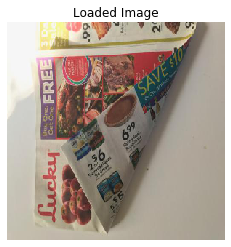

In [ ]:
test_img = 'Data/Test/paper/paper522.jpg'
img = image.load_img(test_img, target_size = (300,300))
img = image.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = labels[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

It has been classified as a paper with 32.82% confidence.

In [ ]:
classes = []
probability = []

for i,j in enumerate(prediction[0],0):
  print(labels[i].upper(),':',round(j*100,2),'%')

CARDBOARD : 24.45 %
GLASS : 6.53 %
METAL : 24.15 %
PAPER : 32.83 %
PLASTIC : 5.41 %
TRASH : 6.64 %


These are the probobalities of each label. we can see that paper has the highest percentage as 32.82% and hence we classify the image as paper.

Probability: 0.3138645
Classified: glass 



Text(0.5, 1.0, 'Loaded Image')

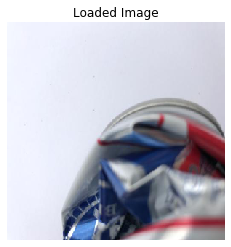

In [ ]:
test_img = 'Data/Test/metal/metal386.jpg'
img = image.load_img(test_img, target_size = (300,300))
img = image.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = labels[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

It has been classified as a glass with 0.31 probability.

In [ ]:
classes = []
probability = []

for i,j in enumerate(prediction[0],0):
  print(labels[i].upper(),':',round(j*100,2),'%')

CARDBOARD : 6.02 %
GLASS : 31.39 %
METAL : 28.7 %
PAPER : 2.43 %
PLASTIC : 19.82 %
TRASH : 11.64 %


These are the probobalities of each label. we can see that glass has the highest percentage as 31.39% and hence we classify the image as glass.

Probability: 0.73188215
Classified: plastic 



Text(0.5, 1.0, 'Loaded Image')

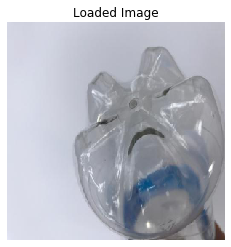

In [ ]:
test_img = 'Data/Test/plastic/plastic430.jpg'
img = image.load_img(test_img, target_size = (300,300))
img = image.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = labels[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

It has been classified as a plastic with 0.731 probability.

In [ ]:
classes = []
probability = []

for i,j in enumerate(prediction[0],0):
  print(labels[i].upper(),':',round(j*100,2),'%')

CARDBOARD : 1.21 %
GLASS : 12.64 %
METAL : 3.43 %
PAPER : 8.79 %
PLASTIC : 73.19 %
TRASH : 0.73 %


These are the probobalities of each label. we can see that plastic has the highest percentage as 73.19% and hence we classify the image as plastic.

Probability: 0.9974033
Classified: cardboard 



Text(0.5, 1.0, 'Loaded Image')

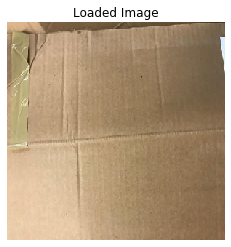

In [ ]:
test_img = 'Data/Test/cardboard/cardboard355.jpg'
img = image.load_img(test_img, target_size = (300,300))
img = image.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = labels[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

It has been classified as a cardboard with 0.99 probability.

In [ ]:
classes = []
probability = []

for i,j in enumerate(prediction[0],0):
  print(labels[i].upper(),':',round(j*100,2),'%')

CARDBOARD : 99.74 %
GLASS : 0.02 %
METAL : 0.0 %
PAPER : 0.0 %
PLASTIC : 0.16 %
TRASH : 0.08 %


These are the probobalities of each label. we can see that cardboard has the highest percentage as 99.74% and hence we classify the image as cardboard.

## SAVE THE MODEL:

In [ ]:
model.save('modelnew.h5')

Since deep learning models can take hours, days, and even weeks to train, it is important to save and load them from a disk.We can later load this model from the file and use it.